# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [1]:
#Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [2]:
data=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/My Drive/LS24-Machine Learning/data',
    labels='inferred',
    label_mode='int',
    class_names=['Cheetah','Crocodile','Elephants','Tiger'],
    color_mode='rgb',
    image_size=(128,128),
    shuffle=True,
    seed=123,
    batch_size=32
)

Found 1658 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [3]:
data_iterator=data.as_numpy_iterator()

In [4]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

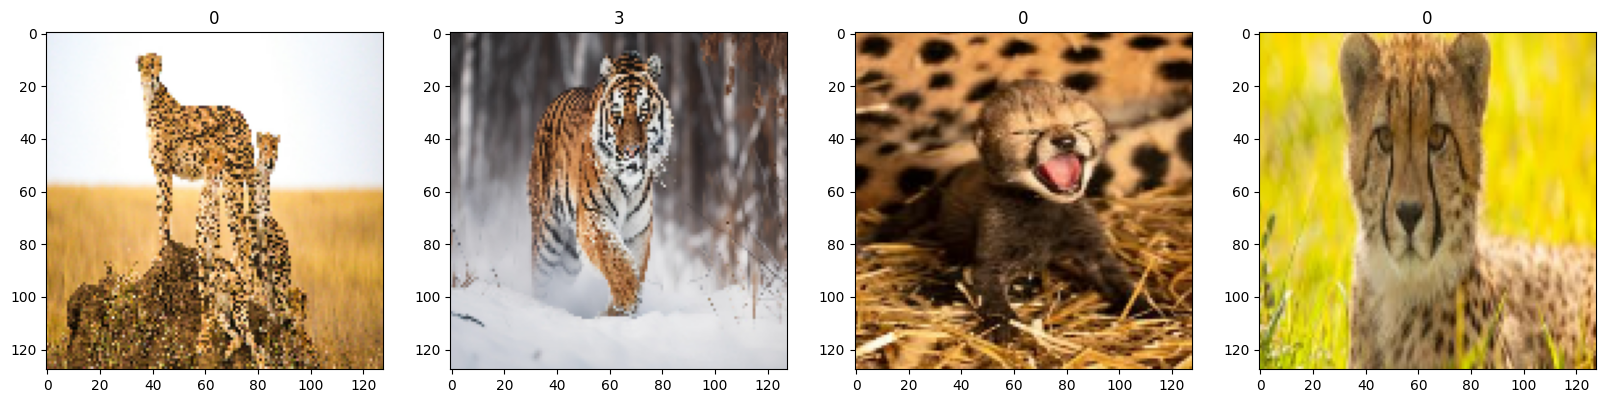

In [5]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [6]:
def normalize_image(image, label):
    image=tf.cast(image, tf.float32)/255.0
    return image,label
data=data.map(normalize_image)

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [7]:
#Your code here
data_size=len(data)
train_size=int(data_size*0.8)
test_size=data_size-train_size
data_train=data.take(train_size)
data_test=data.skip(train_size)

**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [8]:
model=keras.Sequential([
    keras.Input(shape=(128,128,3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

**Q.6** Compile your model

In [9]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [11]:
model.fit(data_train,epochs=30,validation_data=data_test, verbose=2)

Epoch 1/30
41/41 - 183s - loss: 1.3323 - accuracy: 0.3369 - val_loss: 1.2371 - val_accuracy: 0.4855 - 183s/epoch - 4s/step
Epoch 2/30
41/41 - 24s - loss: 1.1796 - accuracy: 0.4764 - val_loss: 1.0636 - val_accuracy: 0.5578 - 24s/epoch - 577ms/step
Epoch 3/30
41/41 - 25s - loss: 1.0385 - accuracy: 0.5747 - val_loss: 0.9784 - val_accuracy: 0.6012 - 25s/epoch - 612ms/step
Epoch 4/30
41/41 - 23s - loss: 0.9487 - accuracy: 0.6090 - val_loss: 0.9460 - val_accuracy: 0.5867 - 23s/epoch - 553ms/step
Epoch 5/30
41/41 - 24s - loss: 0.8471 - accuracy: 0.6730 - val_loss: 0.8441 - val_accuracy: 0.6590 - 24s/epoch - 579ms/step
Epoch 6/30
41/41 - 24s - loss: 0.7824 - accuracy: 0.7050 - val_loss: 0.8105 - val_accuracy: 0.6821 - 24s/epoch - 584ms/step
Epoch 7/30
41/41 - 32s - loss: 0.7483 - accuracy: 0.7218 - val_loss: 0.7216 - val_accuracy: 0.7457 - 32s/epoch - 783ms/step
Epoch 8/30
41/41 - 24s - loss: 0.6777 - accuracy: 0.7546 - val_loss: 0.6314 - val_accuracy: 0.7659 - 24s/epoch - 575ms/step
Epoch 9/3

**Q.8** Test your code with test set

In [12]:
loss,accuracy=model.evaluate(data_test,verbose=2)

11/11 - 12s - loss: 0.3360 - accuracy: 0.8699 - 12s/epoch - 1s/step


In [13]:
# Do not change this code
if accuracy>=0.85:
  print("Congratulations, CNN assignment complete!!")
else:
  print("Try again, not enough accuracy")

Congratulations, CNN assignment complete!!


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**